<img src="https://devra.ai/analyst/notebook/2757/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Fitness Dataset Analysis and Predictive Modeling</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

This notebook dives into the synthetic fitness classification dataset. It is loaded, cleaned, analyzed and used to build a predictive model. If you find this notebook useful, please consider upvoting it.

## Table of Contents

- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion](#Conclusion)

In [1]:
# Import required libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensuring backend switch if only plt is imported
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Set a plot style
sns.set(style="whitegrid")

print('Imports complete.')

Imports complete.


In [2]:
# Data Loading
print('Loading dataset...')
df = pd.read_csv('/kaggle/input/fitness-classification-dataset-synthetic/fitness_dataset.csv', delimiter=',', encoding='ascii')

# Display first few rows of the dataset
print('Dataset loaded with shape:', df.shape)
df.head()

Loading dataset...
Dataset loaded with shape: (2000, 11)


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [3]:
# Data Cleaning and Preprocessing
print('Starting data cleaning...')

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# A common conundrum: if you find NaN values, do not just throw your hands in the air. Instead, impute or drop them.
if missing_values.sum() > 0:
    # For this example, we impute numeric values with mean and categorical with most frequent
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Impute numeric columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)

    # Impute categorical columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)

    print('Imputation complete.')
else:
    print('No missing values found.')

# Verify that there are no missing values
assert df.isnull().sum().sum() == 0, 'There are still missing values in the dataset.'
print('Data cleaning complete.')

Starting data cleaning...
Missing values in each column:
age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64
Imputation complete.
Data cleaning complete.


Starting Exploratory Data Analysis...


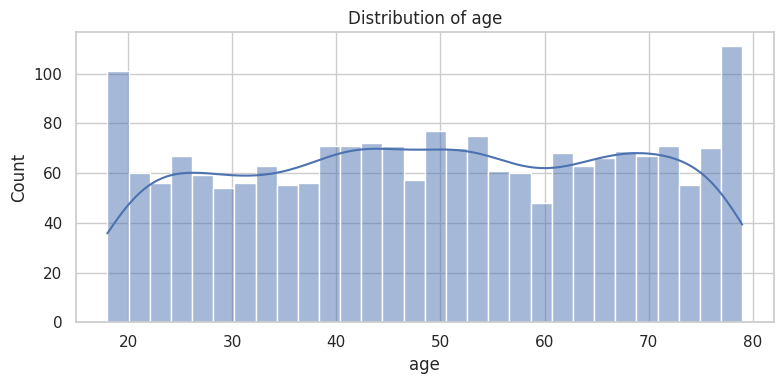

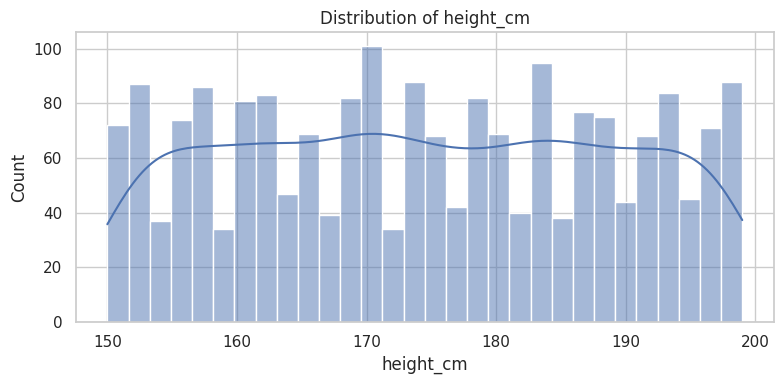

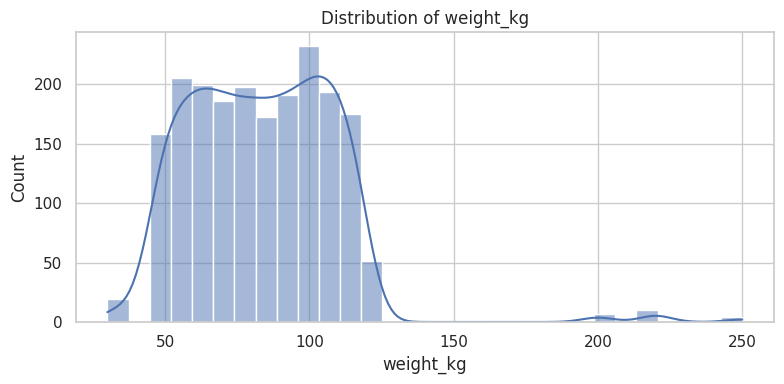

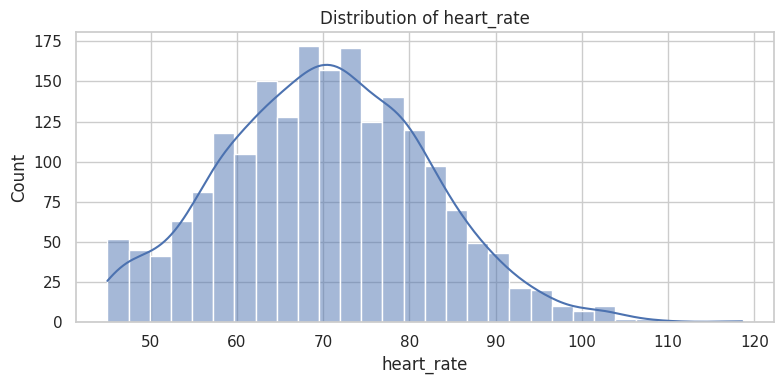

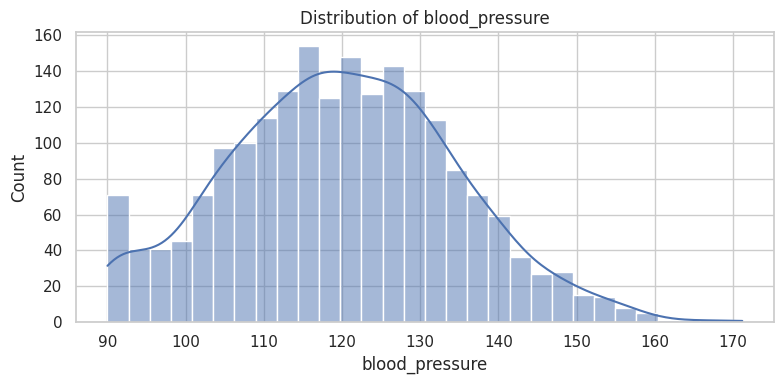

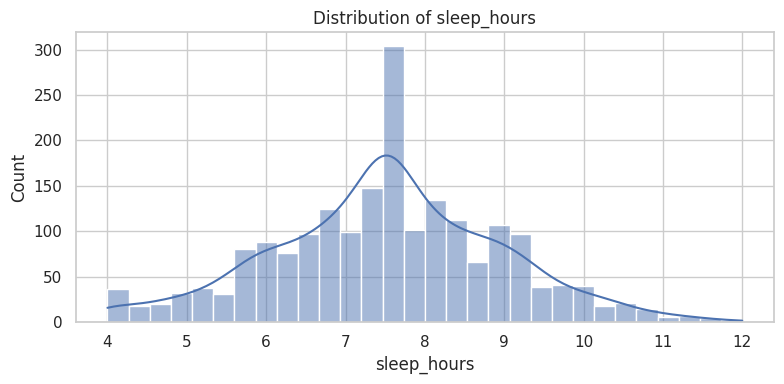

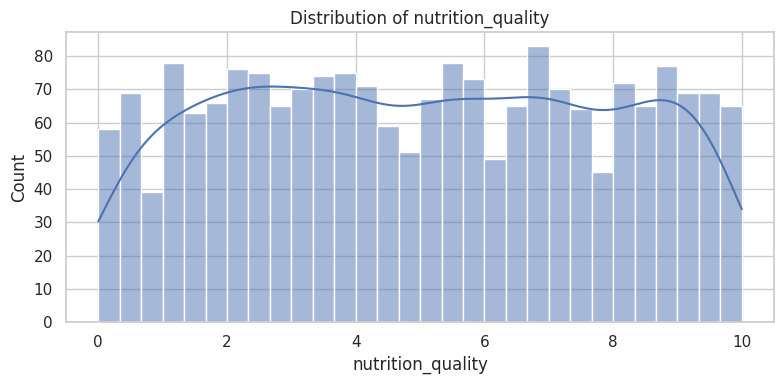

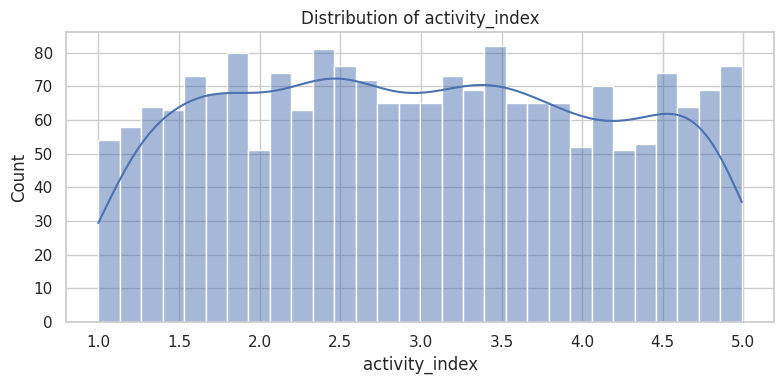

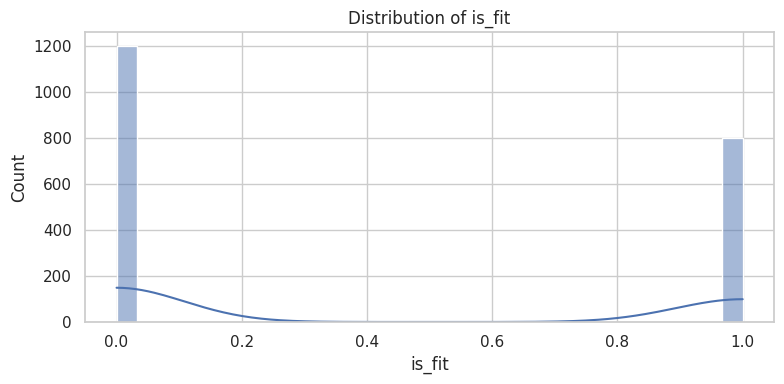

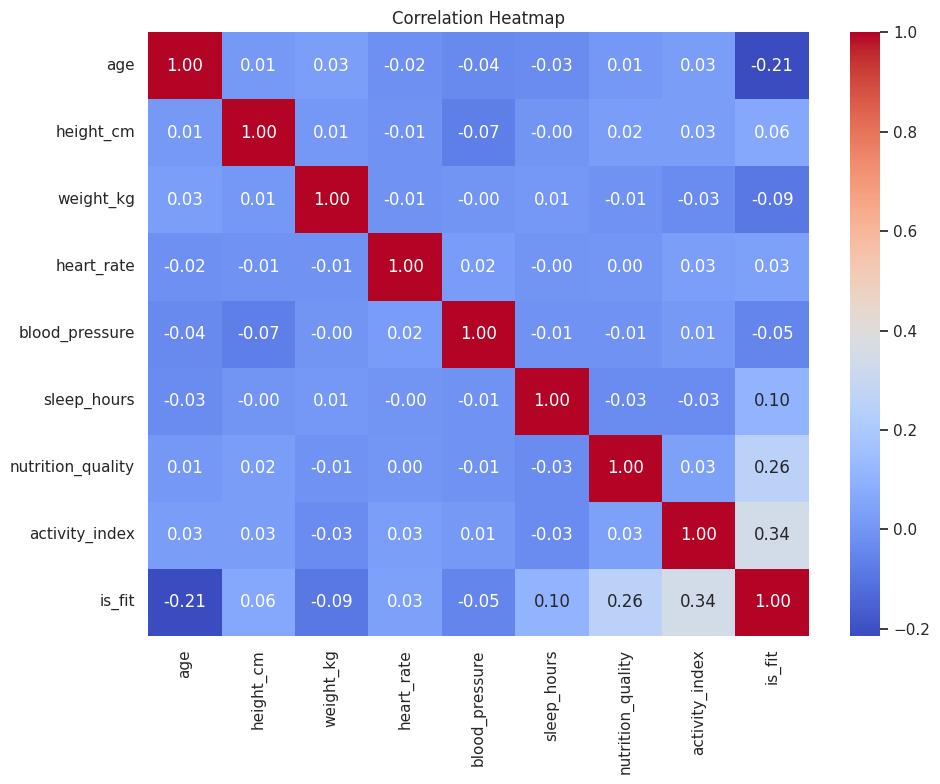

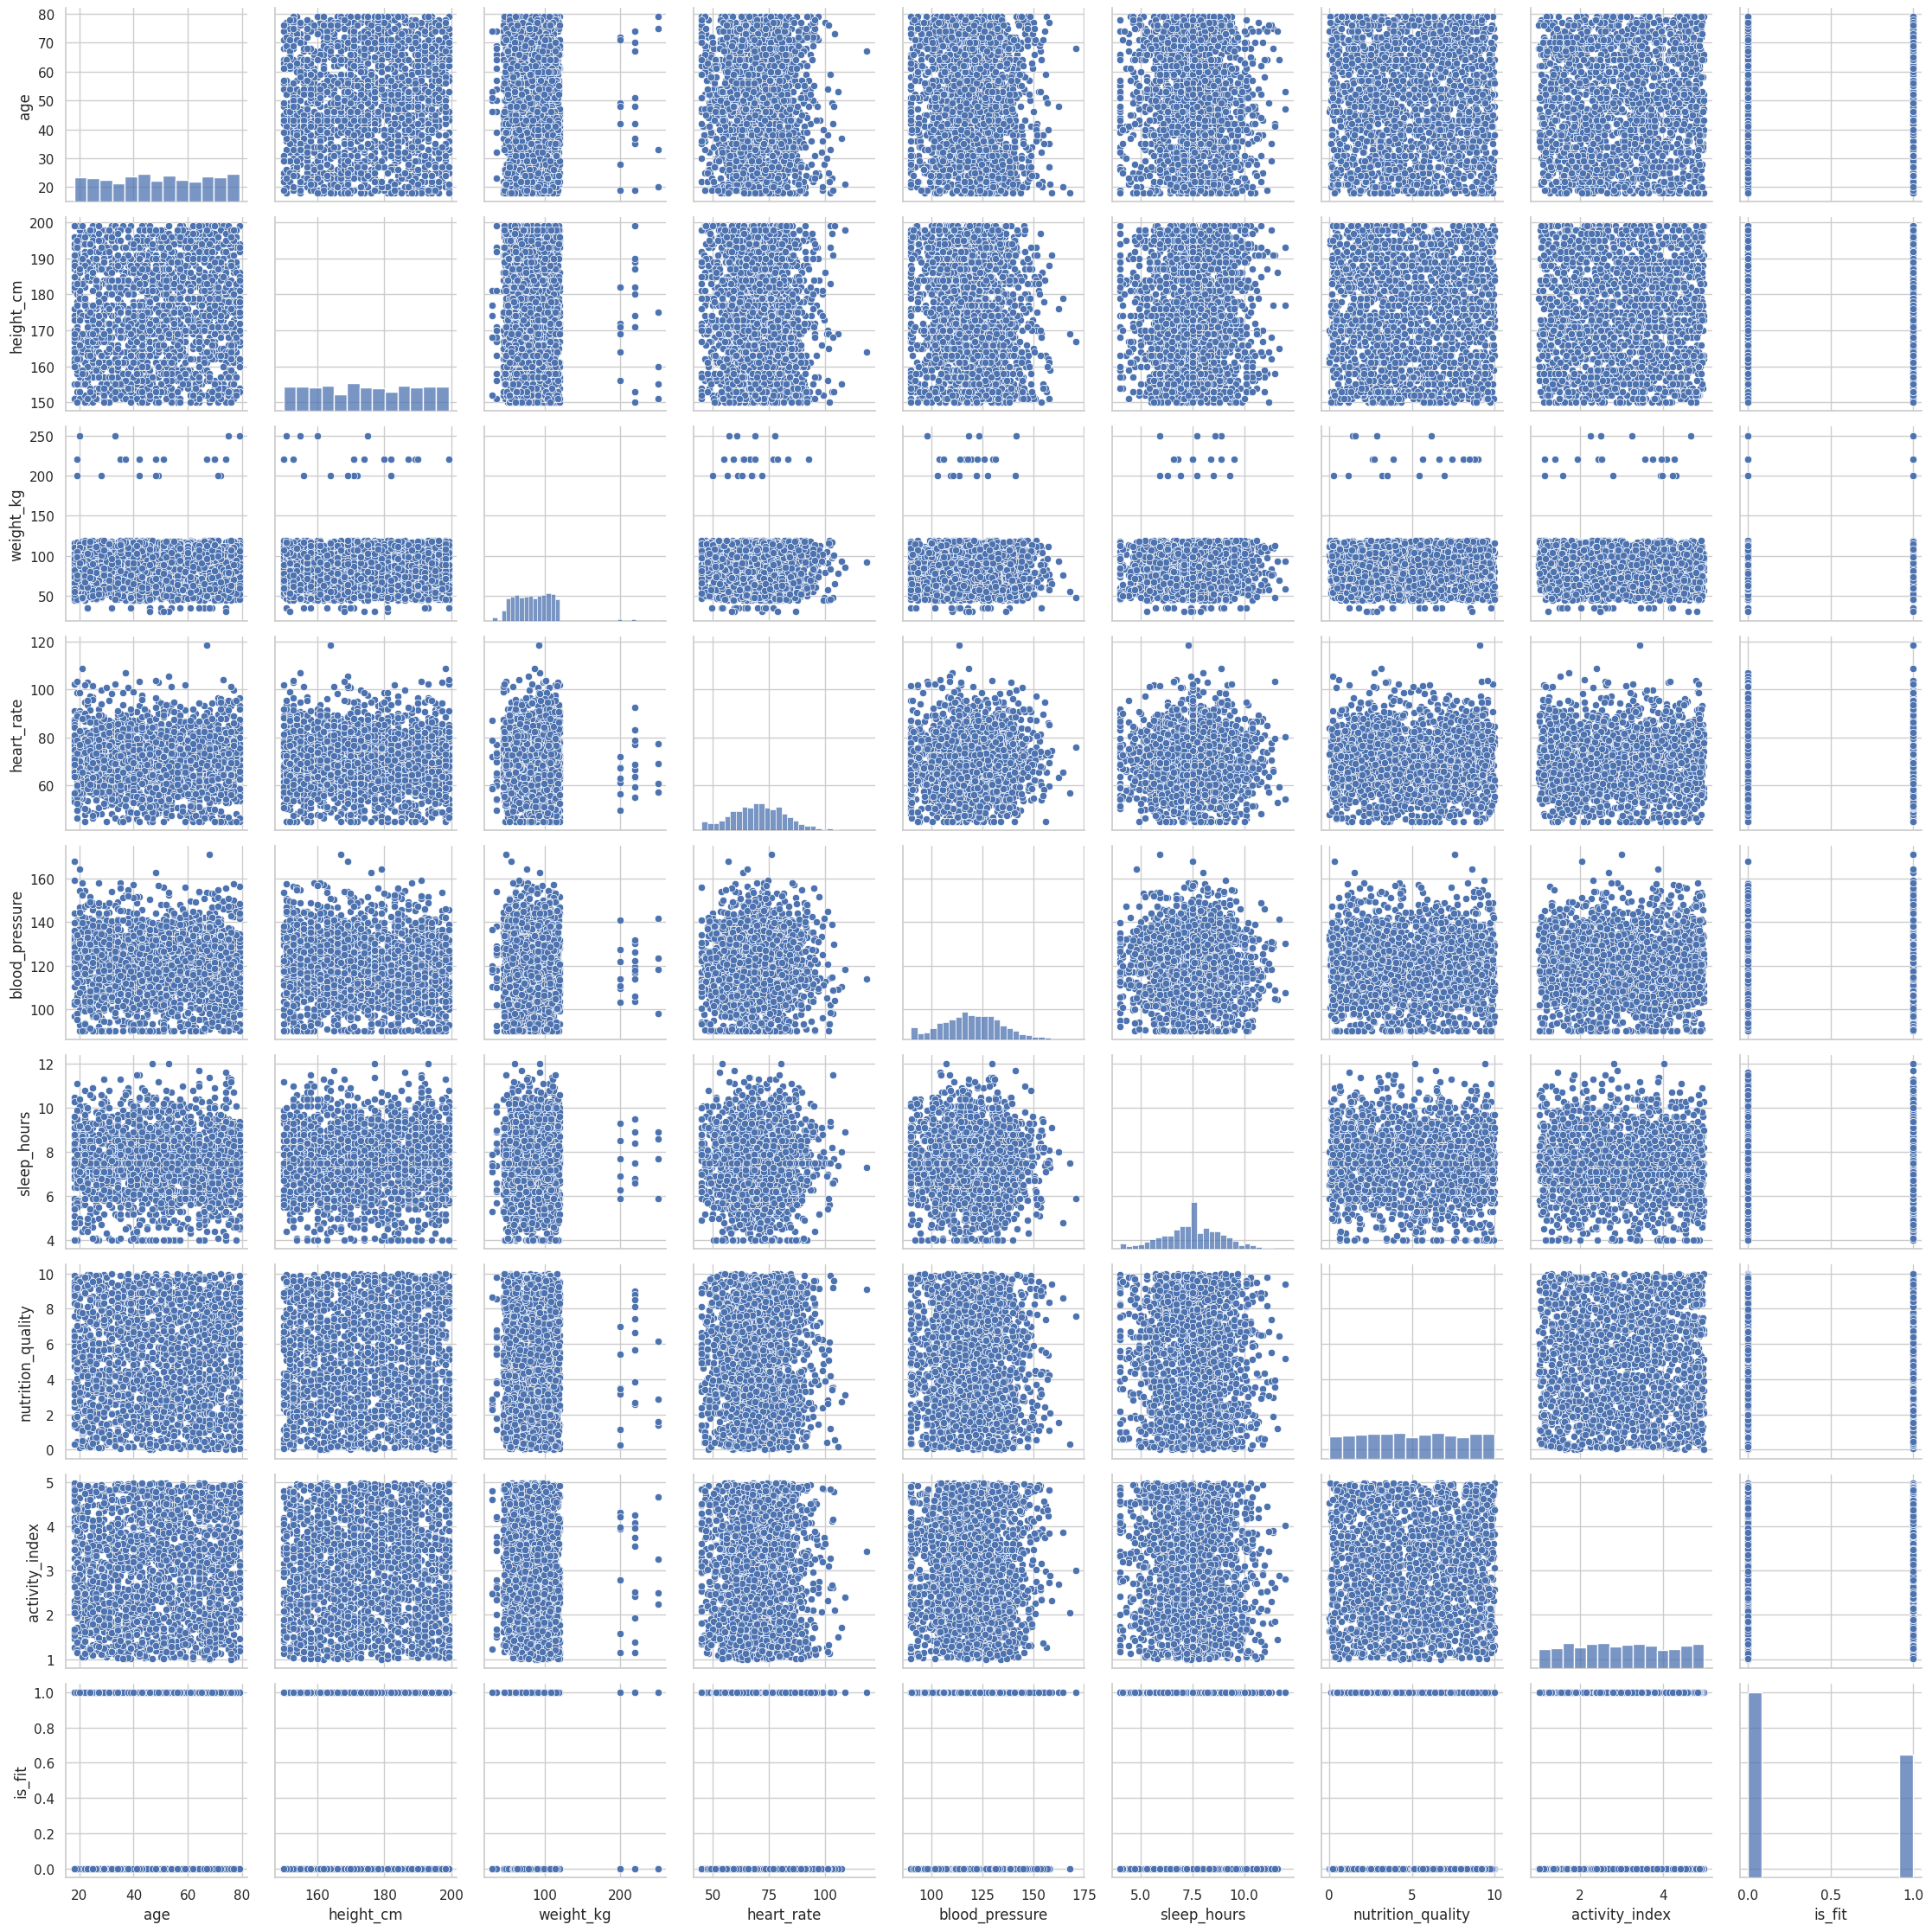

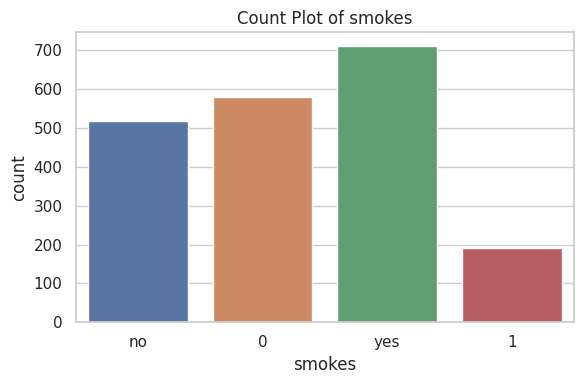

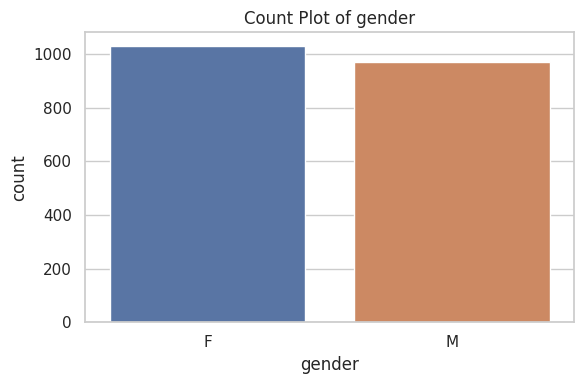

Exploratory Data Analysis complete.


In [4]:
# Exploratory Data Analysis
print('Starting Exploratory Data Analysis...')

## Distribution of Numeric Features
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Correlation Heatmap (only if four or more numeric columns are present)
if len(numeric_cols) >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

## Pair Plot
sns.pairplot(df[numeric_cols])
plt.tight_layout()
plt.show()

## Categorical Feature Counts
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

print('Exploratory Data Analysis complete.')

Starting Predictive Modeling...
Model training complete.
Prediction Accuracy: 0.77


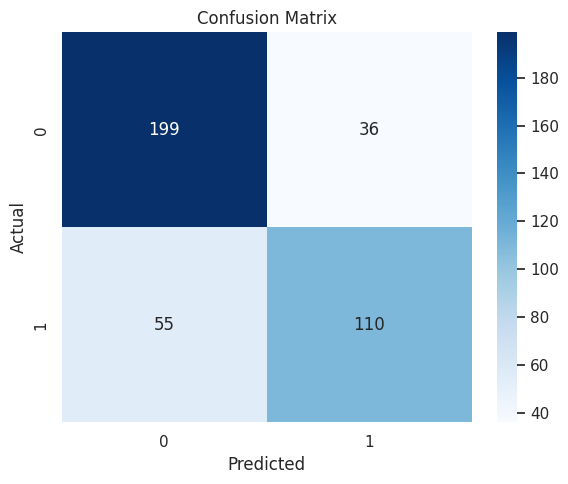

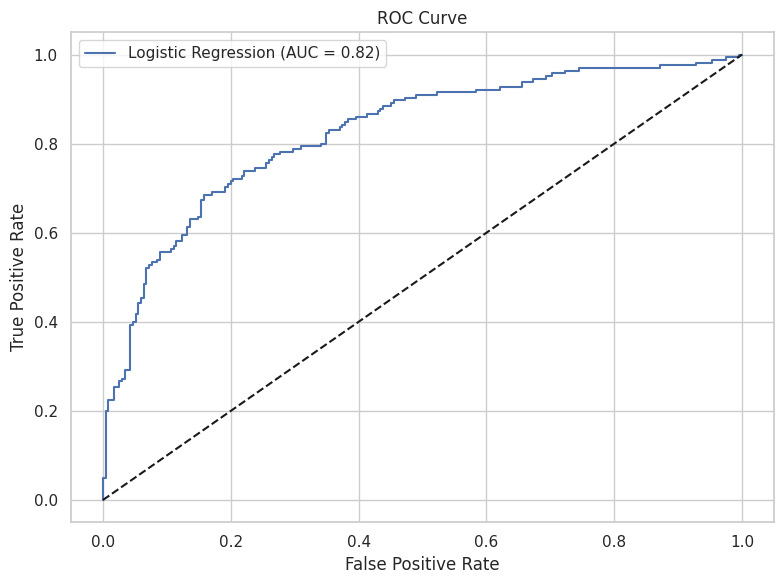

Predictive Modeling complete.


In [5]:
# Predictive Modeling
print('Starting Predictive Modeling...')

# Prepare features and target variable
X = df.drop('is_fit', axis=1)
y = df['is_fit']

# Define which columns are numeric and which are categorical
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# For robust pipelines, we add imputation steps before encoding or passing through numeric values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# Create the column transformer that applies the appropriate transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with data preprocessing and logistic regression classifier
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
print('Model training complete.')

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC Curve
y_probs = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Summarize the approach
# The merits of this approach include a transparent, step-by-step data preprocessing
# pipeline, robust handling of missing values, and clear visualization of model performance.
# In future analyses, one might explore advanced feature engineering or ensemble methods
# to further improve prediction accuracy.

print('Predictive Modeling complete.')

## Conclusion

This notebook explored the synthetic fitness dataset from multiple angles. We ensured that missing values were properly handled, performed an exploratory data analysis using a variety of visualizations, and built a predictive model with a well-structured pipeline. The predictive model, based on logistic regression, provided a clear and interpretable assessment of fitness classification.

Future work could include trying alternative models such as ensemble methods, conducting deeper feature engineering, or exploring techniques to better handle possible class imbalances. Your feedback is appreciated; please upvote if you found this notebook useful.